In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statistics import stdev
from statistics import mean

In [17]:
def function_fit(x, a, b):
    return a * x + b

Valores del ajuste: 
    a:0.8125778332765086 ± 0.013524403441345796
     b: 0.07567767558950733 ± 0.09295979720590808

Coeficiente de Pearson: 0.9994464264258133


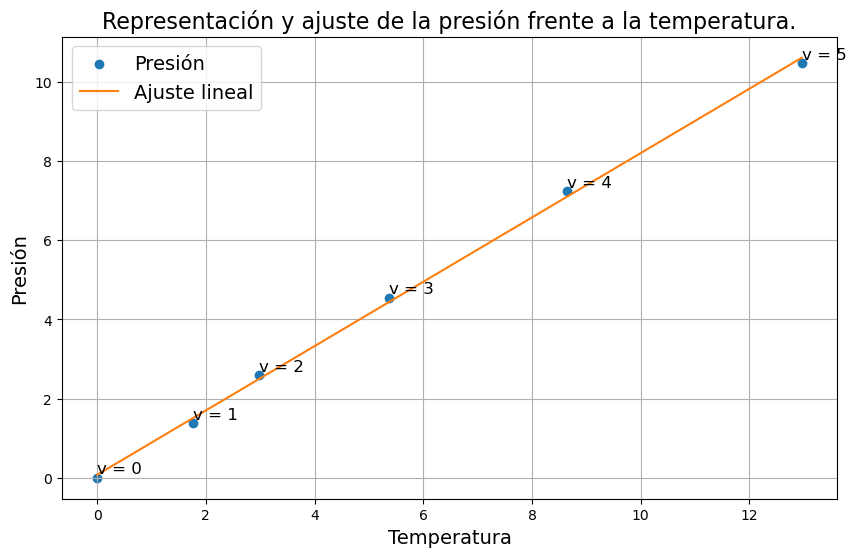

In [18]:
datos_presion = pd.read_csv('datos_apartado_3/pressure.txt', header=0, delimiter=",", names=['v', 'Temp', 'P'])

popt, pcov = curve_fit(function_fit, datos_presion.Temp, datos_presion.P)
data_pred = function_fit(datos_presion.Temp, popt[0], popt[1])

mediax = mean(datos_presion.Temp)
mediay = mean(datos_presion.P)

mediaxy = mean(datos_presion.Temp*datos_presion.P)
sigmax = stdev(datos_presion.Temp)
sigmay = stdev(datos_presion.P)
coef_Pearson = len(datos_presion.Temp)*(mediaxy-mediax*mediay)/((len(datos_presion.Temp)-1)*sigmax*sigmay)

print("Valores del ajuste: ")
print(f"    a:{popt[0]} \u00B1 {np.sqrt(pcov.diagonal()[0])}")
if popt.size > 1:
    print(f"     b: {popt[1]} \u00B1 {np.sqrt(pcov.diagonal()[1])}")
print("")
print(f'Coeficiente de Pearson: {coef_Pearson}')

fig=plt.figure(figsize=(10,6)) #Size of the plot
ax=fig.add_subplot(111)

plt.scatter(datos_presion.Temp, datos_presion.P, label="Presión")
plt.plot(datos_presion.Temp, data_pred, label="Ajuste lineal", color='tab:orange')
for i in range(len(datos_presion.Temp)):
    ax.text(datos_presion.Temp[i], datos_presion.P[i]+0.1, f'v = {datos_presion.v[i]}', fontsize=12)
plt.xlabel("Temperatura", fontsize=14)
plt.ylabel("Presión", fontsize=14)
plt.legend(fontsize=14)
plt.title("Representación y ajuste de la presión frente a la temperatura.", fontsize=16)
plt.grid()

plt.savefig('latex/plots/ajuste_presion.png', bbox_inches='tight', pad_inches=0.1)

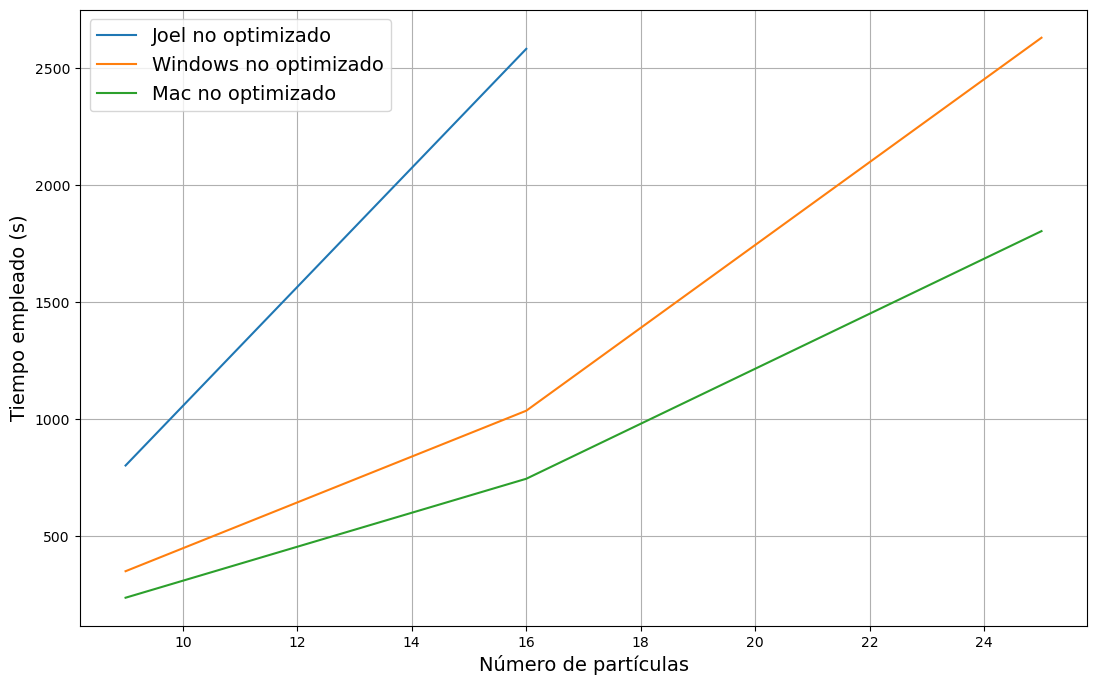

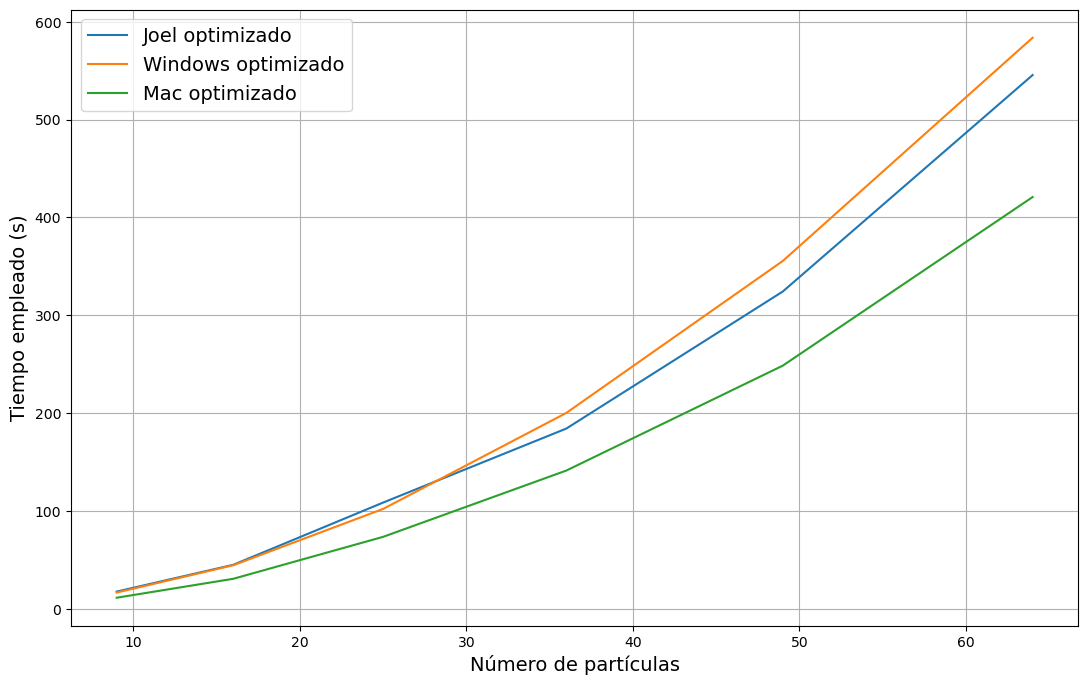

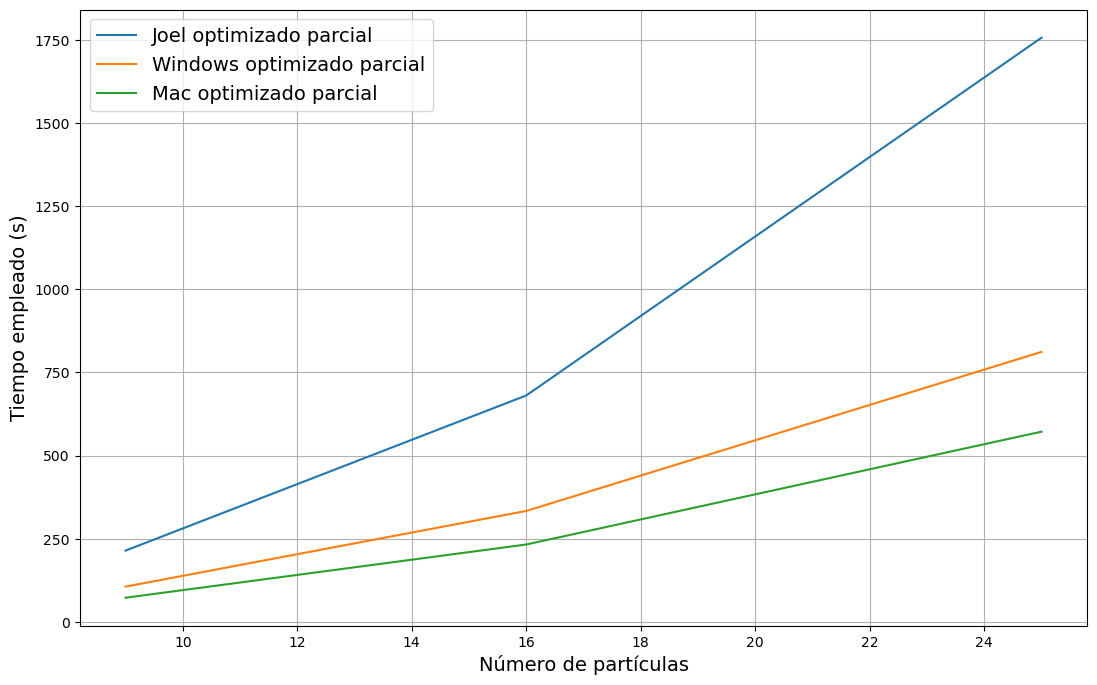

In [19]:
datos_joel_no_optimizado = pd.read_csv('optimizaciones/no_optimizado/datos_joel.txt', header=0, delimiter=",", names=['N', 'h', 'time', 'run_time'])
datos_joel_optimizado = pd.read_csv('optimizaciones/optimizado/datos_joel.txt', header=0, delimiter=",", names=['N', 'h', 'time', 'run_time'])
datos_joel_optimizado_parcial = pd.read_csv('optimizaciones/optimizado_parcial/datos_joel.txt', header=0, delimiter=",", names=['N', 'h', 'time', 'run_time'])

datos_windows_no_optimizado = pd.read_csv('optimizaciones/no_optimizado/datos_windows.txt', header=0, delimiter=",", names=['N', 'h', 'time', 'run_time'])
datos_windows_optimizado = pd.read_csv('optimizaciones/optimizado/datos_windows.txt', header=0, delimiter=",", names=['N', 'h', 'time', 'run_time'])
datos_windows_optimizado_parcial = pd.read_csv('optimizaciones/optimizado_parcial/datos_windows.txt', header=0, delimiter=",", names=['N', 'h', 'time', 'run_time'])

datos_mac_no_optimizado = pd.read_csv('optimizaciones/no_optimizado/datos_mac.txt', header=0, delimiter=",", names=['N', 'h', 'time', 'run_time'])
datos_mac_optimizado = pd.read_csv('optimizaciones/optimizado/datos_mac.txt', header=0, delimiter=",", names=['N', 'h', 'time', 'run_time'])
datos_mac_optimizado_parcial = pd.read_csv('optimizaciones/optimizado_parcial/datos_mac.txt', header=0, delimiter=",", names=['N', 'h', 'time', 'run_time'])

fig=plt.figure(figsize=(13,8)) #Size of the plot
ax=fig.add_subplot(111)

plt.plot(datos_joel_no_optimizado.N, datos_joel_no_optimizado.run_time, label="Joel no optimizado", color='tab:blue')
plt.plot(datos_windows_no_optimizado.N, datos_windows_no_optimizado.run_time, label="Windows no optimizado", color='tab:orange')
plt.plot(datos_mac_no_optimizado.N, datos_mac_no_optimizado.run_time, label="Mac no optimizado", color='tab:green')

plt.xlabel("Número de partículas", fontsize=14)
plt.ylabel("Tiempo empleado (s)", fontsize=14)
plt.legend(fontsize=14)
plt.title(f"", fontsize=16)
plt.grid()

plt.savefig('latex/plots/no_optimizado.png', bbox_inches='tight', pad_inches=0.1)

fig=plt.figure(figsize=(13,8)) #Size of the plot
ax=fig.add_subplot(111)

plt.plot(datos_joel_optimizado.N, datos_joel_optimizado.run_time, label="Joel optimizado", color='tab:blue')
plt.plot(datos_windows_optimizado.N, datos_windows_optimizado.run_time, label="Windows optimizado", color='tab:orange')
plt.plot(datos_mac_optimizado.N, datos_mac_optimizado.run_time, label="Mac optimizado", color='tab:green')

plt.xlabel("Número de partículas", fontsize=14)
plt.ylabel("Tiempo empleado (s)", fontsize=14)
plt.legend(fontsize=14)
plt.title(f"", fontsize=16)
plt.grid()

plt.savefig('latex/plots/optimizado.png', bbox_inches='tight', pad_inches=0.1)

fig=plt.figure(figsize=(13,8)) #Size of the plot
ax=fig.add_subplot(111)

plt.plot(datos_joel_optimizado_parcial.N, datos_joel_optimizado_parcial.run_time, label="Joel optimizado parcial", color='tab:blue')
plt.plot(datos_windows_optimizado_parcial.N, datos_windows_optimizado_parcial.run_time, label="Windows optimizado parcial", color='tab:orange')
plt.plot(datos_mac_optimizado_parcial.N, datos_mac_optimizado_parcial.run_time, label="Mac optimizado parcial", color='tab:green')

plt.xlabel("Número de partículas", fontsize=14)
plt.ylabel("Tiempo empleado (s)", fontsize=14)
plt.legend(fontsize=14)
plt.title(f"", fontsize=16)
plt.grid()

plt.savefig('latex/plots/optimizado_parcial.png', bbox_inches='tight', pad_inches=0.1)
